<a href="https://colab.research.google.com/github/RohitPrograms/ACR-Indicator/blob/main/Principal_Components_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# All packages used throughout this notebook

# General
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

# Scikit-Learn
from sklearn.datasets import load_diabetes

# Visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In order to delve into Principal Component Analysis (PCA), we first have to understand what a __projection__ is. Suppose we have a vector x &in; R<sup>n</sup>, and a unit vector v &in; R<sup>n</sup> that we are projecting on.<br><br>
$$
\text{Projection of x onto v} = proj_{v}x = \left( \frac{x \cdot v}{\lVert v \rVert} \right)v = (v^{T}x)v
$$

Suppose we wanted to find the magnitude of this projection as well. Since v<sup>T</sup> is 1xn and x is nx1, we know that v<sup>T</sup>xv is just the unit vector v multiplied by a scalar (v<sup>T</sup>x). <br><br>
$$
\lVert v^{T}xv \rVert = v^{T}x = v \cdot x
$$

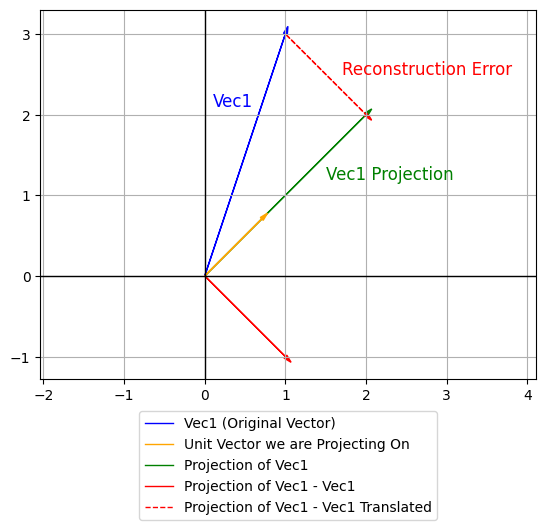

In [ ]:
# Visualization of a Projected Space

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

vec1 = np.array([1,3])
projection_space = np.array([1,1])
projection_space = [1,1] / np.linalg.norm(projection_space)
proj_vec1 = np.matmul(projection_space.T, vec1) * projection_space

graph_space = pd.DataFrame(columns = ['x', 'y'])
graph_space.loc[0] = vec1
graph_space.loc[1] = proj_vec1
graph_space.loc[2] = projection_space
graph_space.loc[3] = (proj_vec1 - vec1)

colors = ['blue','green','orange','red']
for i in range(len(graph_space)):
  if i == 3:
    plt.arrow(x = 1, y = 3, dx = graph_space.loc[i]['x'], dy = graph_space.loc[i]['y'], color = colors[i], head_width=0.05,head_length=0.1, linestyle = '--')
  plt.arrow(x = 0, y = 0, dx = graph_space.loc[i]['x'], dy = graph_space.loc[i]['y'], color = colors[i], head_width=0.05,head_length=0.1)

plt.axhline(y = 0, color = 'black', linewidth = 1)
plt.axvline(x = 0, color = 'black', linewidth = 1)

plt.text(1.7, 2.5, "Reconstruction Error", fontsize=12, color='red')
plt.text(1.5, 1.2, "Vec1 Projection", fontsize=12, color = 'green')
plt.text(0.1, 2.1, "Vec1", fontsize = 12, color = 'blue')

plt.axis('equal')
plt.grid(True)


legend_elements = [Line2D([0], [0], color='blue', lw = 1, label = 'Vec1 (Original Vector)'),
                  Line2D([0], [0], color='orange', lw = 1, label = 'Unit Vector we are Projecting On'),
                  Line2D([0], [0], color='green', lw = 1, label = 'Projection of Vec1'),
                  Line2D([0], [0], color='red', lw = 1, label = 'Projection of Vec1 - Vec1'),
                  Line2D([0], [0], color='red', linestyle = '--', lw = 1, label="Projection of Vec1 - Vec1 Translated")]
plt.legend(handles = legend_elements, loc = 'lower center', bbox_to_anchor=(0.5, -0.4))
plt.show()



Now suppose we have multiple data points x<sub>i</sub>. For PCA, we are trying to find the 'best' projection space for all x<sub>i</sub>. But what does that mean?

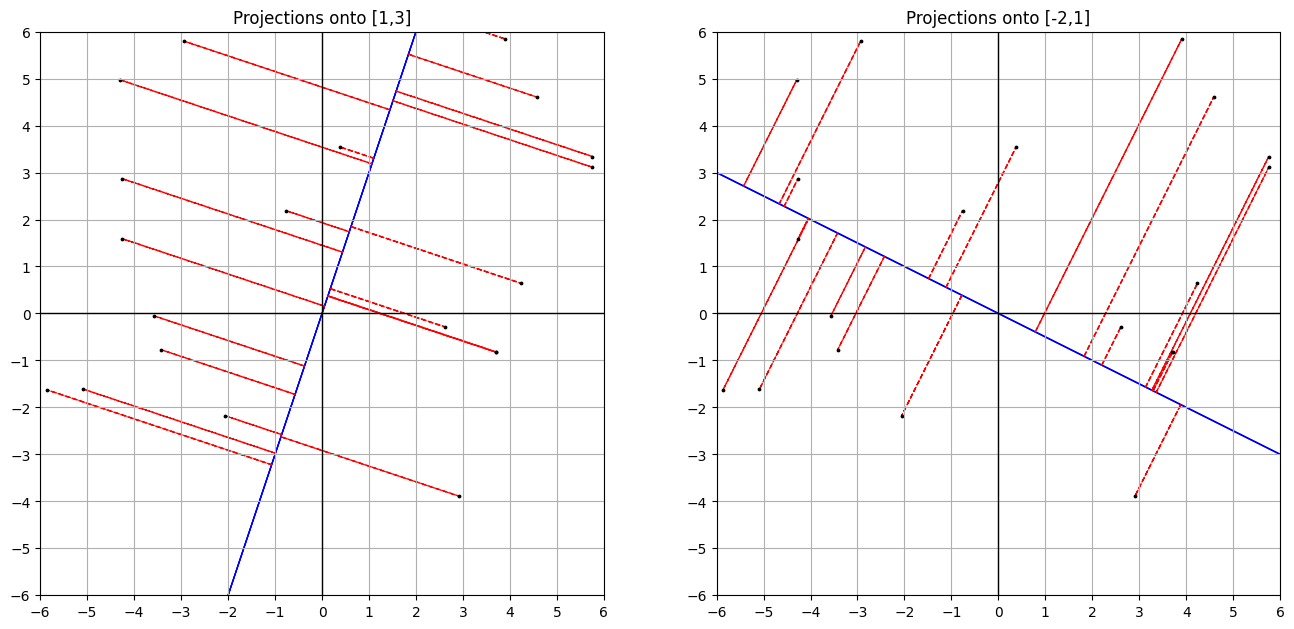

In [ ]:
points = [np.random.uniform(-6,6,20), np.random.uniform(-6,6,20)]
projection_spaces = [np.array([1,3]), np.array([-2,1])]

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].arrow(x = -2 * projection_spaces[0][0], y = -2 * projection_spaces[0][1], dx = 4 * projection_spaces[0][0], dy = 4 * projection_spaces[0][1], color = 'blue')
axs[1].arrow(x = -3 * projection_spaces[1][0], y = -3 * projection_spaces[1][1], dx = 6 * projection_spaces[1][0], dy = 6 * projection_spaces[1][1], color = 'blue')

for i in range(len(projection_spaces)):

  projection_space = projection_spaces[i]
  projection_space = projection_space / np.linalg.norm(projection_space)

  for j in range(len(points[0])):
    current_vector = np.array([points[0][j], points[1][j]])
    projected_vector = np.matmul(projection_space.T, current_vector) * projection_space
    reconstruction_error = projected_vector - current_vector
    axs[i].arrow(x = current_vector[0], y = current_vector[1], dx = reconstruction_error[0], dy = reconstruction_error[1], color = 'red', linestyle = '--', linewidth = 1)

for ax in axs:
  ax.scatter(x = points[0], y = points[1], color = 'black', s = 3)

  ax.axhline(y = 0, color = 'black', linewidth = 1)
  ax.axvline(x = 0, color = 'black', linewidth = 1)

  ax.set_xlim([-6, 6])
  ax.set_ylim([-6, 6])
  ax.set_xticks(range(-6,7,1))
  ax.set_yticks(range(-6,7,1))
  ax.set_aspect('equal')
  ax.grid(True)

axs[0].set_title('Projections onto [1,3]')
axs[1].set_title('Projections onto [-2,1]')
plt.show()

The best projection space is the projection vector that explains the most variance within the data. This is known as a __principal component__. In order to explain the most variance in the data, we want to pick a projection space v that minimizes the total reconstruction error. <br>

Similar to how we minimize Mean Squared Error (MSE) for OLS Regression, we can minimize the mean value of the Reconstruction Errors Squared. <br>

From the graphic above, we can see that we can form a right traingle with a vector x, it's projection, and the reconstruction error. Therefore, for every data point x<sub>i</sub>, we have the following...

$$
\lVert \text{Reconstruction Error}_{i} \rVert^{2} = \lVert x_{i} \rVert^{2} - \lVert  v^{T}x_{i}v \rVert^{2}
$$
<br>
$$
= \lVert x_{i} \rVert^{2} - (v^{T}x_{i})^{2}
$$
<br>
Therefore we are finding the unit vector v that minimizes the following...
$$
\min_{v : v^{T}=1} \frac{1}{N} \sum_{i = 1}^{N} \lVert x_{i} \rVert^{2} - (v^{T}x_{i})^{2}
$$
<br>
No matter what v we pick, the first part of the summation will stay the same
<br>
$$
\therefore \min_{v : v^{T}v=1} \frac{1}{N} \sum_{i = 1}^{N} \lVert x_{i} \rVert^{2} - (v^{T}x_{i})^{2} = \max_{v : v^{T}v=1} \frac{1}{N} \sum_{i = 1}^{N} (v^{T}x_{i})^{2}
$$
<br>
By definition of expectation, we have...
$$
\max_{v : v^{T}v=1}\frac{1}{N} \sum_{i = 1}^{N} (v^{T}x_{i})^{2} = \max_{v : v^{T}v=1}E[(v^{T}x_{i})^{2}]
$$
<br>
$$
=\max_{v : v^{T}v=1} Var(v^{T}x_{i}) - \left(E[v^{T}x_{i}]\right)^{2}
$$
<br>
$$
= \max_{v : v^{T}v=1}Var(v^{T}x_{i})
$$
<br>
$$
\therefore \min_{v : v^{T}v=1} \frac{1}{N} \sum_{i = 1}^{N} \lVert x_{i} \rVert^{2} - (v^{T}x_{i})^{2} = \max_{v : v^{T}v=1} Var(v^{T}x_{i})
$$
<br>
As we can see, minimizing the mean reconstruction error squared is the same thing as maximizing the variance of our projections. This makes sense since we are trying to find the unit vector v that explains the most variance.
<br><br>
Through the defintion of variance, we can formulate our optimization problem into the following...
<br>
$$
\max_{v : v^{T}v=1}Var(v^{T}x_{i}) = \max_{v : v^{T}v=1}\frac{1}{N} \sum_{i=1}^{N} (v^{T}x_{i} - E[v^{T}x_{i}])^2
$$
<br>
A key assumption when performing PCA is that our data is __scaled__. This means that our data would be preprocessed and have a mean of 0. This would cause the mean of our projections to be 0 as well.
$$
\therefore \max_{v : v^{T}v=1}\frac{1}{N} \sum_{i=1}^{N} (v^{T}x_{i} - E[v^{T}x_{i}])^2 = \max_{v : v^{T}v=1}\frac{1}{N} \sum_{i=1}^{N} (v^{T}x_{i})^{2}
$$
<br>
To further simplify, let X be an N x p matrix that represents every single x<sub>i</sub> &in; R<sup>p</sup>.
$$
X = \begin{bmatrix}
x_{1}^{T} \\
x_{2}^{T} \\
\vdots \\
x_{n}^{T}
\end{bmatrix}
=
\begin{bmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,p} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n,1} & x_{n,2} & \cdots & x_{n,p}
\end{bmatrix}
$$
<br>
$$
Xv =
\begin{bmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,p} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n,1} & x_{n,2} & \cdots & x_{n,p}
\end{bmatrix}
\begin{bmatrix}
v_{1} \\
v_{2} \\
\vdots \\
v_{p}
\end{bmatrix} =
\begin{bmatrix}
v^{T}x_{1} \\
v^{T}x_{2} \\
\vdots \\
v^{T}x_{n}
\end{bmatrix}
$$
<br><br>
$$
\lVert Xv \rVert^{2} = \sqrt{(v^{T}x_{1})^{2} + (v^{T}x_{2})^{2} + \cdots + (v^{T}x_{n})^{2}}
$$
<br>
$$
= (v^{T}x_{1})^{2} + (v^{T}x_{2})^{2} + \cdots + (v^{T}x_{n})^{2}
$$
<br>
$$
\therefore \sum_{i=1}^{N} (v^{T}x_{i})^{2} = \lVert Xv \rVert^{2}
$$
<br>
$$
\therefore \max_{v : v^{T}v=1}\frac{1}{N} \sum_{i=1}^{N} (v^{T}x_{i})^{2} = \max_{v : v^{T}v=1}\frac{1}{N}\lVert Xv \rVert^{2}
$$
<br>
This is a much easier way to approach our optimization since everything is represented in one matrix.
<br><br>
$$
\max_{v : v^{T}v=1}\frac{1}{N}\lVert Xv \rVert^{2} = \max_{v : v^{T}v=1}\frac{1}{N}(Xv)^{T}(Xv) = \max_{v : v^{T}v=1}\frac{1}{N} v^{T}X^{T}Xv
$$
<br>
$$
= \max_{v : v^{T}v=1} v^{T} \left( \frac{X^{T}X}{N} \right)v
$$
<br>
The next question that arises is what (X<sup>T</sup>X)/N actually is.
<br><br>
$$
\frac{X^{T}X}{N} = \frac{1}{N}
\begin{bmatrix}
x_{1,1} & x_{2,1} & \cdots & x_{n,1} \\
x_{1,2} & x_{2,2} & \cdots & x_{n,2} \\
\vdots & \vdots & \ddots & \vdots \\
x_{1,p} & x_{2,p} & \cdots & x_{n,p}
\end{bmatrix}
\begin{bmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,p} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n,1} & x_{n,2} & \cdots & x_{n,p}
\end{bmatrix}
$$
<br><br>
$$
=
\begin{bmatrix}
\frac{1}{N}\sum_{i=1}^{n} x_{i,1}^{2} & \frac{1}{N}\sum_{i=1}^{n} x_{i,1}x_{i,2} & \cdots & \frac{1}{N}\sum_{i=1}^{n} x_{i,1}x_{i,p} \\
\frac{1}{N}\sum_{i=1}^{n} x_{i,2}x_{i,1} & \frac{1}{N}\sum_{i=1}^{n} x_{i,2}^{2} & \cdots & \frac{1}{N}\sum_{i=1}^{n} x_{i,2}x_{i,p} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{1}{N}\sum_{i=1}^{n} x_{i,p}x_{i,1} & \frac{1}{N}\sum_{i=1}^{n} x_{i,p}x_{i,2} & \cdots & \frac{1}{N}\sum_{i=1}^{n} x_{i,p}^{2}
\end{bmatrix}
$$
<br><br>
$$
= \begin{bmatrix}
E[Pred_{1}^{2}] & E[Pred_{1}Pred_{2}] & \cdots & E[Pred_{1}Pred_{p}] \\
E[Pred_{2}Pred_{1}] & E[Pred_{2}^{2}]  & \cdots & E[Pred_{2}Pred_{p}]  \\
\vdots & \vdots & \ddots & \vdots \\
E[Pred_{p}Pred_{1}]  & E[Pred_{p}Pred_{2}]  & \cdots & E[Pred_{p}^{2}]
\end{bmatrix}
$$
<br>
The formula/definition of __covariance__ is helpful here.
<br><br>
$$
Cov(Pred_{i}, Pred_{j}) = E[Pred_{i}Pred_{j}] - E[Pred_{i}]E[Pred_{j}]
$$
<br>
Since we scaled our data (or at least assume we did), the mean value of any predictor is 0.
<br><br>
$$
\therefore Cov(Pred_{i}, Pred_{j}) = E[Pred_{i}Pred_{j}]
$$
<br>
$$
\therefore
\begin{bmatrix}
E[Pred_{1}^{2}] & E[Pred_{1}Pred_{2}] & \cdots & E[Pred_{1}Pred_{p}] \\
E[Pred_{2}Pred_{1}] & E[Pred_{2}^{2}]  & \cdots & E[Pred_{2}Pred_{p}]  \\
\vdots & \vdots & \ddots & \vdots \\
E[Pred_{p}Pred_{1}]  & E[Pred_{p}Pred_{2}]  & \cdots & E[Pred_{p}^{2}]
\end{bmatrix}
$$
<br><br>
$$
=
\begin{bmatrix}
Var(Pred_{1}) & Cov(Pred_{1}, Pred_{2}) & \cdots & Cov(Pred_{1}, Pred_{p}) \\
Cov(Pred_{2}, Pred_{1}) & Var(Pred_{2})  & \cdots & Cov(Pred_{2}, Pred_{p})  \\
\vdots & \vdots & \ddots & \vdots \\
Cov(Pred_{p}, Pred_{1})  & Cov(Pred_{p}, Pred_{2})  & \cdots & Var(Pred_{p})
\end{bmatrix}
$$
<br><Br>
$$
= \text{Covariance Matrix} \sum
$$
<br><br>
$$
\therefore \max_{v : v^{T}v=1} v^{T} \left( \frac{X^{T}X}{N} \right)v = \max_{v : v^{T}v=1} v^{T}\sum v
$$
<br>
To solve this, we can utilize the method of lagrangians.
<br>
$$
\max_{v : v^{T}v=1} v^{T}\sum v
$$
<br>
$$
\mathcal{L}(v, \lambda) = v^{T}\sum v - \lambda(v^{T}v - 1)
$$
<br>
$$
\frac{\partial \mathcal{L}}{\partial v} = 2\sum v - 2\lambda v = 0
$$
<br>
$$
\therefore \sum v = \lambda v
$$
<br>
We have now proven that the best projection spaces are the unit eigenvectors of the covariance matrix.
<br><br>
The eigenvector that explains the most variance is the eigenvector associated with the largest eigenvalue. This is known as __PC1__. The egienvector associated with the 2nd largest eigenvalue is called __PC2__ and so forth.

__Performing PCA in Python__
<hr>

Below, I have provided an example of performing PCA on a multivariate normal distribution. Thankfully, scikit-learn has a built in PCA() function, so we don't have to manually do the eigenvector caluclations.
<br><br>
The __n_components__ is there to limit the number of prinicpal components we want to caluclate. The maximum number of Principal Components will always be the dimensionality of our data. In this case, its 2.

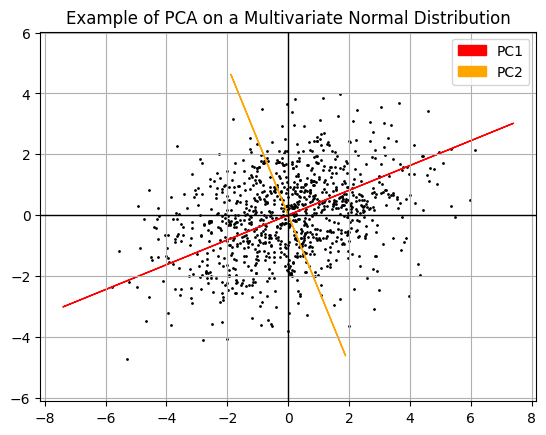

In [ ]:
from sklearn.decomposition import PCA

random_points = np.random.multivariate_normal([0,0], [[4,1], [1,2]], 1000)
pca = PCA(n_components=2)
pca.fit_transform(random_points)

plt.scatter(random_points[:,0], random_points[:,1], color = 'black', s = 1)
plt.arrow(x = -8 * pca.components_[0][0], y = -8 * pca.components_[0][1], dx = 16 * pca.components_[0][0], dy = 16 * pca.components_[0][1], color = 'red', head_width = 0, head_length = 0, linestyle = '-', linewidth = 1, label = 'PC1')
plt.arrow(x = -5 * pca.components_[1][0], y = -5 * pca.components_[1][1], dx = 10 * pca.components_[1][0], dy = 10 * pca.components_[1][1], color = 'orange', head_width = 0, head_length = 0, linestyle = '-', linewidth = 1, label = 'PC2')
plt.axhline(y = 0, color = 'black', linewidth = 1)
plt.axvline(x = 0, color = 'black', linewidth = 1)
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.title('Example of PCA on a Multivariate Normal Distribution')
plt.show()


Below is another example of PCA implementation. This time, it is on the diabetes dataset for scikit-learn. This time, I'll show each Principal Component along with it's percentage of explained variance.

In [ ]:
diabetes = load_diabetes(scaled = True)
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


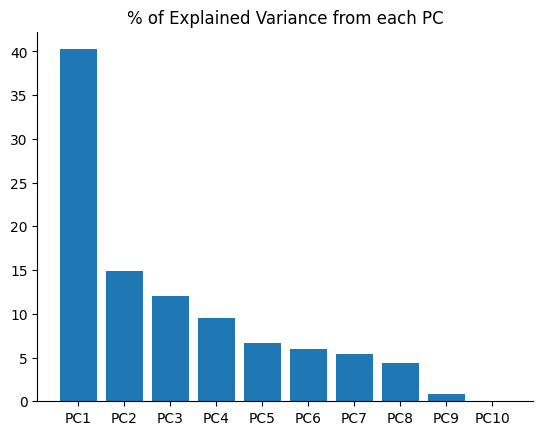

In [ ]:
PCA2 = PCA(n_components = len(df.columns.drop('target')))

PCA2.fit_transform(df[df.columns.drop('target')])

plt.bar([f'PC{i+1}' for i in range(10)], 100 * PCA2.explained_variance_ / sum(PCA2.explained_variance_ ))
plt.title('% of Explained Variance from each PC')
plt.gca().spines[['right', 'top']].set_visible(False)
plt.show()
